<a href="https://colab.research.google.com/github/ucfilho/Numeric_Methods_ChemEng/blob/master/Mod_3_class_04_outros_set_29_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [2]:
# http://math.oit.edu/~paulr/Upper/Math_45x/Math_452/multistep.pdf

In [3]:
#Runge-Kutta "Classic" Order 4 method
def RK4(t0,tn,n,y0):
  h = abs(tn-t0)/n
  t = np.linspace(t0,tn,n+1)
  y = np.zeros(n+1)
  y[0] = y0
  for i in range(0,n):
    K1 = f(t[i],y[i])
    K2 = f(t[i]+h/2,y[i]+K1*h/2)
    K3 = f(t[i]+h/2,y[i]+K2*h/2)
    K4 = f(t[i]+h,y[i]+K3*h)
    y[i+1] = y[i] + h*(K1+2*K2+2*K3+K4)/6
  return y




#Adams-Bashforth 3 Step Method
def AdBash3(t0,tn,n,y0):
  h = abs(tn-t0)/n
  t = np.linspace(t0,tn,n+1)
  y = np.zeros(n+1)
  y[0:3] = RK4(t0,t0+2*h,2,y0)
  K1 = f(t[1],y[1])
  K2 = f(t[0],y[0])
  for i in range(2,n):
    K3 = K2
    K2 = K1
    K1 = f(t[i],y[i])
    y[i+1] = y[i] + h*(23*K1-16*K2+5*K3)/12
  return y
#Adams-Bashforth 3/Moulton 4 Step Predictor/Corrector
def PreCorr3(t0,tn,n,y0):
  h = abs(tn-t0)/n
  t = np.linspace(t0,tn,n+1)
  y = np.zeros(n+1)
  #Calculate initial steps with Runge-Kutta 4
  y[0:3] = RK4(t0,t0+2*h,2,y0)
  K1 = f(t[1],y[1])
  K2 = f(t[0],y[0])
  for i in range(2,n):
    K3 = K2
    K2 = K1
    K1 = f(t[i],y[i])
  #Adams-Bashforth Predictor
  y[i+1] = y[i] + h*(23*K1-16*K2+5*K3)/12
  K0 = f(t[i+1],y[i+1])
  #Adams-Moulton Corrector
  y[i+1] = y[i] + h*(9*K0+19*K1-5*K2+K3)/24
  return y

In [4]:
def f( x, t ):
  return np.sin( t )

a, b = ( 0.0, 10.0 )
x0 = -1.0

n = 200
t = np.linspace( a, b, n )
tol = 1e-6
fg =1
n = n-1
t0 = 0
tn = 6
y0 = 0

ye = AdBash3(t0,tn,n,y0)
ypc = PreCorr3(t0,tn,n,y0)
yrk=RK4(t0,tn,n,y0)
xsci_py = odeint(f, y0, t)

In [5]:
# compute true solution values in equal spaced and unequally spaced cases
#x = -np.exp( 1.0 - np.cos( t ) )
x=-np.cos(t)

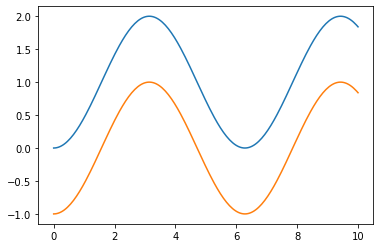

In [6]:
#plt.plot(t,ypc)
#plt.plot(t,ye)
#plt.plot(t,yrk)
plt.plot(t,xsci_py)
plt.plot(t,x)